# Reproducing AGBD estimates from GEDI L2A RH metrics
This tutorial shows how to reconstruct L4A aboveground biomass density (AGBD) estimates using L2A relative height (RH) metrics. We will use a GEDI L4A file `GEDI04_A_2020207182449_O09168_03_T03028_02_002_01_V002.h5` and corresponding GEDI L2A file `GEDI02_A_2020207182449_O09168_03_T03028_02_003_01_V002.h5` for this purpose.

In [1]:
# import all the modules
from os import path
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Let's open the L4A file, and read model parameters into a pandas dataframe

In [2]:
# GEDI L4a file
l4a = 'GEDI04_A_2020207182449_O09168_03_T03028_02_002_01_V002.h5'
l4af = path.join('full_orbits', l4a)
# read the L4A file
hf_l4a = h5py.File(l4af, 'r')

# model_parameters
model_data=hf_l4a['ANCILLARY']['model_data']
predict_stratum = model_data['predict_stratum'].astype('U13')
bias_correction_name = model_data['bias_correction_name'].astype('U13')
bias_correction_value = model_data['bias_correction_value']
x_transform = model_data['x_transform'].astype('U13')
y_transform = model_data['y_transform'].astype('U13')
npar = model_data['npar']
par = model_data['par']
rh_index = model_data['rh_index']

# pandas dataframe
df_l4a_model = pd.DataFrame(list(zip(predict_stratum, bias_correction_name, bias_correction_value,
                                    x_transform,y_transform, npar, par, rh_index)), 
                     columns=['predict_stratum', 'bias_correction_name', 'bias_correction_value',
                                    'x_transform', 'y_transform', 'npar', 'par', 'rh_index'])
df_l4a_model.set_index('predict_stratum', inplace=True)

# print the header rows
df_l4a_model.head()

,bias_correction_name,bias_correction_value,x_transform,y_transform,npar,par,rh_index
predict_stratum,,,,,,,
DBT_Af,Snowdon,1.092463,sqrt,sqrt,3,"[-118.40806579589844, 1.956794023513794, 9.961...","[50, 98, 0, 0, 0, 0, 0, 0]"
DBT_Au,Snowdon,1.017920,sqrt,sqrt,3,"[-155.41419982910156, 7.816701889038086, 7.709...","[70, 98, 0, 0, 0, 0, 0, 0]"
DBT_Eu,Snowdon,0.962632,sqrt,sqrt,3,"[-96.53070068359375, 7.175395488739014, 2.9214...","[70, 98, 0, 0, 0, 0, 0, 0]"
DBT_NAs,Snowdon,1.016632,sqrt,sqrt,3,"[-110.05912780761719, 5.133802890777588, 6.171...","[60, 98, 0, 0, 0, 0, 0, 0]"
DBT_SA,Snowdon,1.105528,sqrt,sqrt,3,"[-134.77015686035156, 6.653591632843018, 6.687...","[50, 98, 0, 0, 0, 0, 0, 0]"


Read the data from 'BEAM0110' into the pandas dataframe 'df_l4a'

In [3]:
shot_number_l4a = hf_l4a['BEAM0110']['shot_number'] # selected algorithm
agbd_l4a = hf_l4a['BEAM0110']['agbd'] # l4a agbd
selected_algorithm_l4a = hf_l4a['BEAM0110']['selected_algorithm'] # selected algorithm
predict_stratum = hf_l4a['BEAM0110']['predict_stratum'] # selected algorithm

df_l4a = pd.DataFrame(list(zip(shot_number_l4a[:], agbd_l4a[:], selected_algorithm_l4a[:], 
                               predict_stratum[:].astype('U13'))), 
                     columns=['shot_number_l4a', 'agbd_l4a', 'selected_algorithm_l4a', 'predict_stratum'])
df_l4a['shot_number_l4a'] = df_l4a['shot_number_l4a'].astype(str).str[-8:]
df_l4a = df_l4a.set_index('shot_number_l4a')

df_l4a.head()

,agbd_l4a,selected_algorithm_l4a,predict_stratum
shot_number_l4a,,,
00475310,-9999.000000,2,ENT_Eu
00475311,25.602335,1,ENT_Eu
00475312,24.043011,1,ENT_Eu
00475313,-9999.000000,2,ENT_Eu
00475314,-9999.000000,1,ENT_Eu


Now, plot the prediction strata

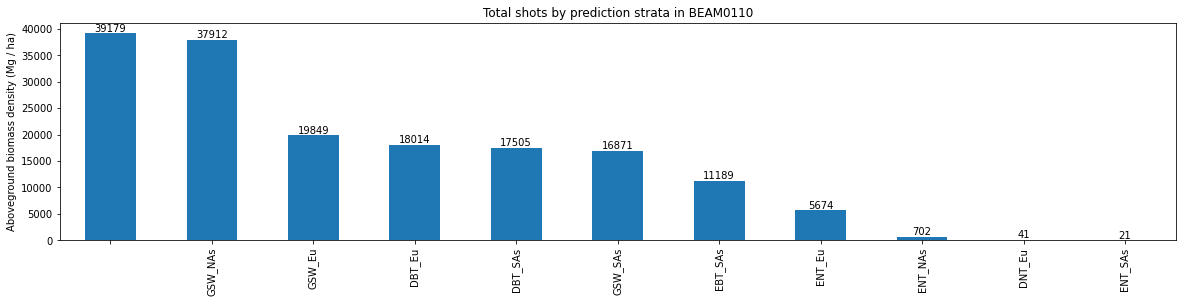

In [4]:
ylabel = agbd_l4a.attrs['long_name'] + ' (' + agbd_l4a.attrs['units'] + ')'
ax = df_l4a.predict_stratum.value_counts().plot(kind='bar',  ylabel=ylabel, figsize=(20, 4))
ax.set_title(f'Total shots by prediction strata in BEAM0110')

ax.bar_label(ax.containers[0])
plt.show()

There are 10 predict strata for the beam. Let's also plot the selected algorithm setting groups.

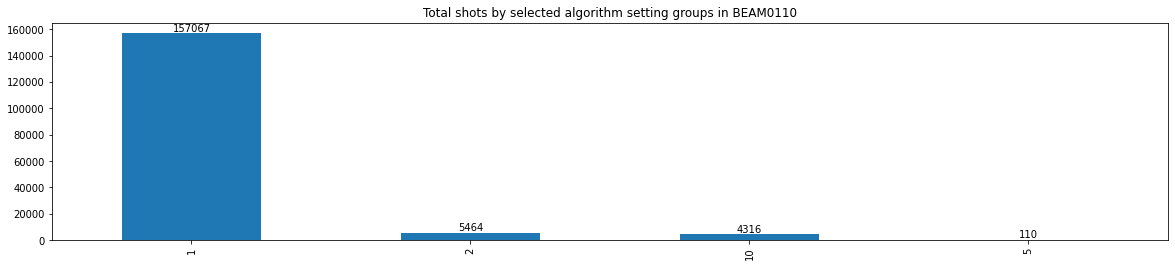

In [5]:
ylabel = selected_algorithm_l4a.attrs['long_name'] + ' (' + selected_algorithm_l4a.attrs['units'] + ')'
ax = df_l4a.selected_algorithm_l4a.value_counts().plot(kind='bar', figsize=(20, 4))
ax.set_title(f'Total shots by selected algorithm setting groups in BEAM0110')
ax.bar_label(ax.containers[0])
plt.show()

There are a total of 4 algorithm setting groups selected for the beam.

Now, open the corresponding GEDI L2A file.

In [6]:
# GEDI L2a file
l2a = 'GEDI02_A_2020207182449_O09168_03_T03028_02_003_01_V002.h5'
l2af = path.join('full_orbits', l2a)

hf_l2a = h5py.File(l2af, 'r')

shot_number_l2a = hf_l2a['BEAM0110']['shot_number']
selected_algorithm_l2a = hf_l2a['BEAM0110']['selected_algorithm']

# selected_algorithm for a shot may be different for L2A and L4A
# it is always advisable to get the RH metrics directly for each 
# algorithm setting groups.

rh_a1 = hf_l2a['BEAM0110']['geolocation']['rh_a1'][:]/100
rh_a2 = hf_l2a['BEAM0110']['geolocation']['rh_a2'][:]/100
rh_a3 = hf_l2a['BEAM0110']['geolocation']['rh_a3'][:]/100
rh_a4 = hf_l2a['BEAM0110']['geolocation']['rh_a4'][:]/100
rh_a5 = hf_l2a['BEAM0110']['geolocation']['rh_a5'][:]/100
rh_a6 = hf_l2a['BEAM0110']['geolocation']['rh_a6'][:]/100

# Algorithm setting group 10 indicates that agorithm setting 5 
# has been used but that the lowest detected mode in this
# algorithm is likely a noise detection and that a higher mode 
# has been subsequently used to calculate the metrics. 
# Please refer to Level 2A user guide for details
# https://lpdaac.usgs.gov/documents/998/GEDI02_UserGuide_V21.pdf
selected_mode = hf_l2a['BEAM0110']['selected_mode'][:]
elevs_allmodes_a5 = hf_l2a['BEAM0110']['geolocation']['elevs_allmodes_a5'][:]
elev_lowestmode_a5 = hf_l2a['BEAM0110']['geolocation']['elev_lowestmode_a5'][:]
elev_lowestmode =[]
for i in range(selected_mode.shape[0]):
    elev_lowestmode.append(elevs_allmodes_a5[i, selected_mode[i]])
elev_lowestmode = np.array(elev_lowestmode)
rh_a10 = rh_a5 - (elev_lowestmode[:, None] - elev_lowestmode_a5[:, None])


df_l2a = pd.DataFrame(list(zip(shot_number_l2a[:], rh_a1, rh_a2, rh_a3, rh_a4, rh_a5, rh_a6, rh_a10, 
                               selected_algorithm_l2a[:])), 
                     columns=['shot_number_l2a', 'rh_a1', 'rh_a2', 'rh_a3', 'rh_a4', 'rh_a5', 'rh_a6', 'rh_a10', 
                              'selected_algorithm_l2a'])
df_l2a['shot_number_l2a'] = df_l2a['shot_number_l2a'].astype(str).str[-8:]
df_l2a.set_index('shot_number_l2a', inplace=True)
df_l2a.head()

,rh_a1,rh_a2,rh_a3,rh_a4,rh_a5,rh_a6,rh_a10,selected_algorithm_l2a
shot_number_l2a,,,,,,,,
00475310,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.08, -1.04, -1.0, -0.97, -0.93, -0.89, -0.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.75, -1.68, -1.6, -1.53, -1.45, -1.38, -1.3...","[-0.33, -0.33, -0.29, -0.29, -0.26, -0.22, -0....","[-4.177726745605469, -4.1077267456054685, -4.0...",2
00475311,"[-1.19, -1.15, -1.12, -1.08, -1.04, -1.04, -1....","[-2.35, -2.27, -2.16, -2.09, -2.01, -1.94, -1....","[-1.26, -1.23, -1.19, -1.15, -1.15, -1.12, -1....","[-1.19, -1.19, -1.15, -1.12, -1.08, -1.08, -1....","[-2.87, -2.68, -2.53, -2.39, -2.27, -2.16, -2....","[-1.97, -1.94, -1.86, -1.79, -1.75, -1.68, -1....","[-2.87, -2.68, -2.53, -2.39, -2.27, -2.16, -2....",1
00475312,"[-0.97, -0.97, -0.93, -0.89, -0.85, -0.85, -0....","[-2.46, -2.39, -2.31, -2.24, -2.16, -2.09, -2....","[-1.19, -1.19, -1.15, -1.12, -1.08, -1.08, -1....","[-0.97, -0.97, -0.93, -0.93, -0.89, -0.89, -0....","[-3.06, -2.95, -2.8, -2.68, -2.57, -2.46, -2.3...","[-2.01, -1.97, -1.9, -1.86, -1.83, -1.75, -1.7...","[-3.06, -2.95, -2.8, -2.68, -2.57, -2.46, -2.3...",1
00475313,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.34, -1.3, -1.26, -1.23, -1.19, -1.15, -1.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.33, -0.29, -0.22, -0.18, -0.11, -0.03, 0.0...","[-0.18, -0.18, -0.18, -0.14, -0.14, -0.14, -0....","[-3.1685696411132813, -3.1285696411132813, -3....",2
00475314,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[158.7861328125, 158.7861328125, 158.786132812...",1


Join the L4A dataframe ('df_l4a') with the L2A dataframe ('df_2a').

In [7]:
df_l4a = df_l4a.join(df_l2a)
df_l4a = df_l4a[df_l4a.agbd_l4a != -9999] # removing Nan L4A agbd values
df_l4a.head()

,agbd_l4a,selected_algorithm_l4a,predict_stratum,rh_a1,rh_a2,rh_a3,rh_a4,rh_a5,rh_a6,rh_a10,selected_algorithm_l2a
shot_number_l4a,,,,,,,,,,,
00475311,25.602335,1,ENT_Eu,"[-1.19, -1.15, -1.12, -1.08, -1.04, -1.04, -1....","[-2.35, -2.27, -2.16, -2.09, -2.01, -1.94, -1....","[-1.26, -1.23, -1.19, -1.15, -1.15, -1.12, -1....","[-1.19, -1.19, -1.15, -1.12, -1.08, -1.08, -1....","[-2.87, -2.68, -2.53, -2.39, -2.27, -2.16, -2....","[-1.97, -1.94, -1.86, -1.79, -1.75, -1.68, -1....","[-2.87, -2.68, -2.53, -2.39, -2.27, -2.16, -2....",1
00475312,24.043011,1,ENT_Eu,"[-0.97, -0.97, -0.93, -0.89, -0.85, -0.85, -0....","[-2.46, -2.39, -2.31, -2.24, -2.16, -2.09, -2....","[-1.19, -1.19, -1.15, -1.12, -1.08, -1.08, -1....","[-0.97, -0.97, -0.93, -0.93, -0.89, -0.89, -0....","[-3.06, -2.95, -2.8, -2.68, -2.57, -2.46, -2.3...","[-2.01, -1.97, -1.9, -1.86, -1.83, -1.75, -1.7...","[-3.06, -2.95, -2.8, -2.68, -2.57, -2.46, -2.3...",1
00475317,24.283388,1,ENT_Eu,"[-1.94, -1.9, -1.83, -1.79, -1.75, -1.68, -1.6...","[-3.13, -3.02, -2.87, -2.76, -2.65, -2.57, -2....","[-2.24, -2.2, -2.12, -2.09, -2.01, -1.97, -1.9...","[-1.94, -1.9, -1.86, -1.79, -1.75, -1.71, -1.6...","[-3.54, -3.36, -3.17, -3.02, -2.87, -2.76, -2....","[-2.8, -2.72, -2.61, -2.53, -2.46, -2.35, -2.3...","[-3.54, -3.36, -3.17, -3.02, -2.87, -2.76, -2....",1
00475318,23.047647,2,ENT_Eu,"[-0.14, -0.14, -0.14, -0.11, -0.11, -0.07, -0....","[-2.2, -2.16, -2.09, -2.01, -1.97, -1.9, -1.86...","[-0.07, -0.07, -0.07, -0.03, -0.03, 0.0, 0.0, ...","[-0.14, -0.14, -0.14, -0.14, -0.14, -0.14, -0....","[-3.06, -2.95, -2.83, -2.72, -2.61, -2.5, -2.4...","[-1.56, -1.53, -1.49, -1.45, -1.38, -1.34, -1....","[-3.06, -2.95, -2.83, -2.72, -2.61, -2.5, -2.4...",2
00475320,23.937260,1,ENT_Eu,"[-0.59, -0.59, -0.56, -0.56, -0.52, -0.52, -0....","[-2.65, -2.57, -2.53, -2.46, -2.39, -2.31, -2....","[-0.85, -0.85, -0.82, -0.82, -0.78, -0.78, -0....","[-0.59, -0.59, -0.59, -0.59, -0.56, -0.56, -0....","[-3.36, -3.24, -3.13, -3.06, -2.95, -2.87, -2....","[-2.05, -2.01, -1.97, -1.9, -1.86, -1.83, -1.7...","[-3.36, -3.24, -3.13, -3.06, -2.95, -2.87, -2....",1


Let's calculate AGBD values from L2A RH metrics and save it to a new column 'agbd_l2a' in the dataframe.

In [8]:
def calculate_agbd(ps, sag, rh1, rh2, rh3, rh4, rh5, rh6, rh10):
    shot_model = df_l4a_model.loc[ps]
    agbd_t_l2a = shot_model['par'][0] # intercept
    for i in range(shot_model['npar']-1):
        r = shot_model['rh_index'][i]
        if (sag == 1):
            rh = rh1
        elif (sag == 2):
            rh = rh2
        elif (sag == 3):
            rh = rh3
        elif (sag == 4):
            rh = rh4
        elif (sag == 5):
            rh = rh5
        elif (sag == 6):
            rh = rh6
        elif (sag == 10):
            rh = rh10
            
        xvar_x = np.sqrt(rh[r] + predictor_offset)
        agbd_t_l2a += shot_model['par'][i+1] * xvar_x

    return (agbd_t_l2a**2) * shot_model['bias_correction_value']

predictor_offset = hf_l4a['BEAM0110']['agbd_prediction'].attrs['predictor_offset']
df_l4a['agbd_l2a']= df_l4a.apply(lambda x: calculate_agbd(x['predict_stratum'], x['selected_algorithm_l4a'],
                                                          x['rh_a1'], x['rh_a2'], x['rh_a3'], x['rh_a4'],
                                                          x['rh_a5'], x['rh_a6'], x['rh_a10'] ), axis=1)


Plot the L4A AGBD values against the AGBD derived from L2A RH metrics by the algorithm setting groups, and by the predict_stratum.

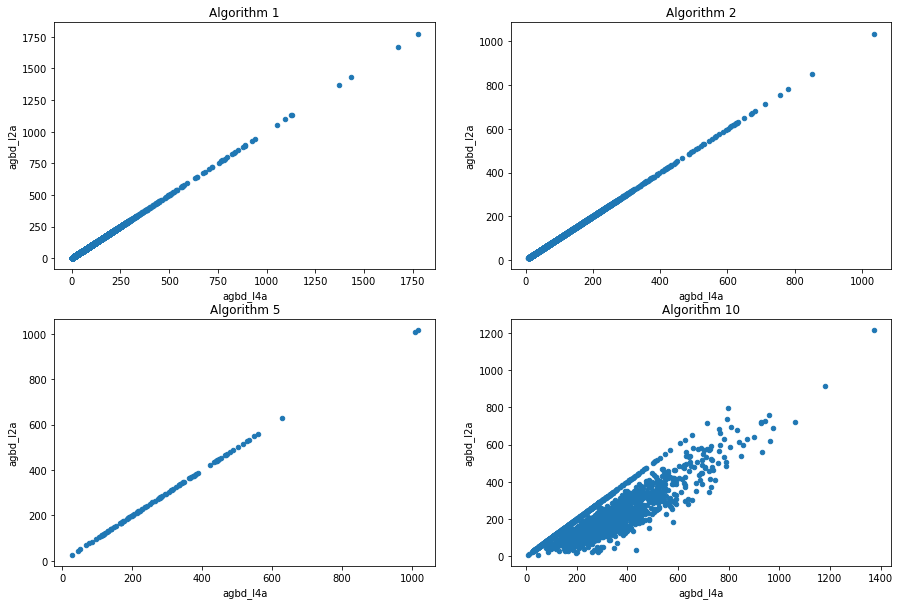

In [9]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
for (alg, alg_group), ax in zip(df_l4a.groupby(df_l4a.selected_algorithm_l4a), axes.flatten()):
    alg_group.plot(x='agbd_l4a', y='agbd_l2a', kind='scatter', ax=ax, title="Algorithm " + str(alg))

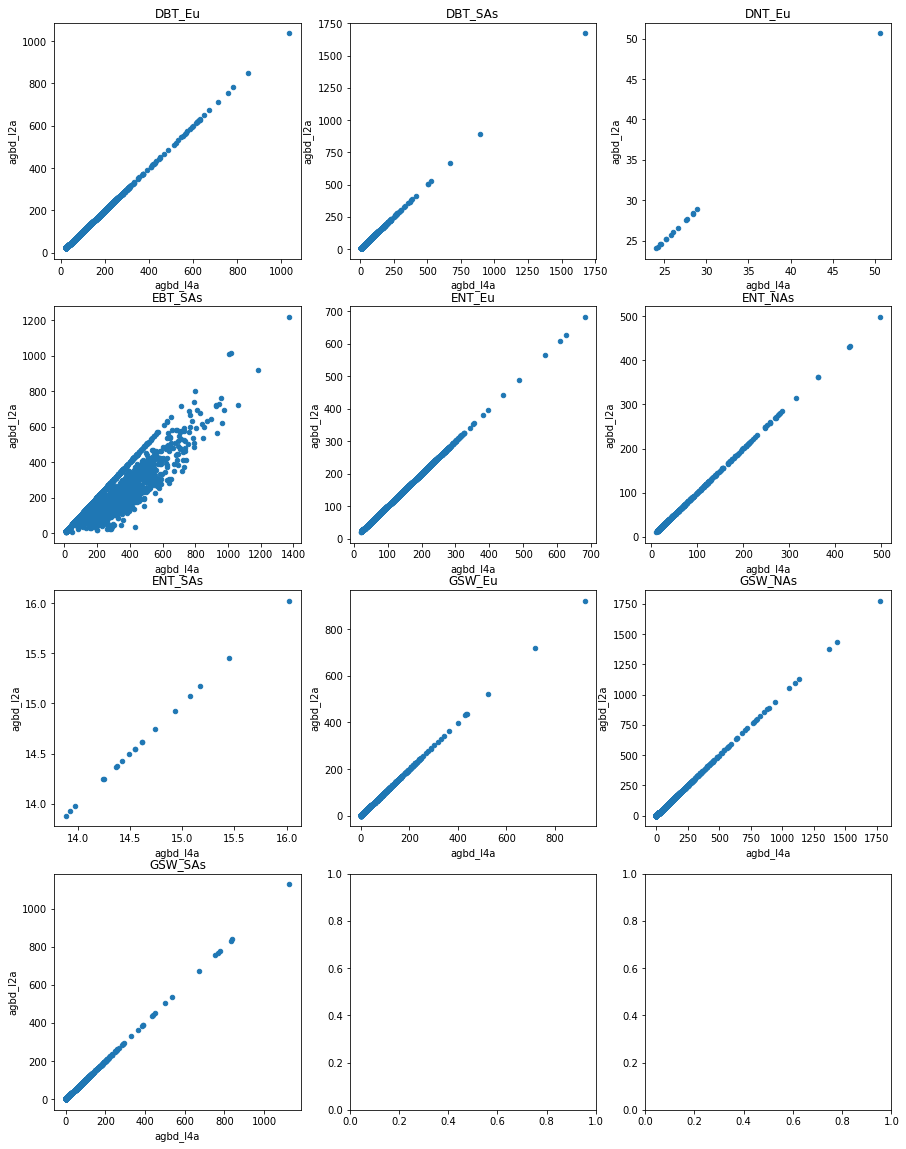

In [10]:
fig, axes = plt.subplots(4,3, figsize=(15,20))
for (stratum_name, stratum), ax in zip(df_l4a.groupby(df_l4a.predict_stratum), axes.flatten()):
    stratum.plot(x='agbd_l4a', y='agbd_l2a', kind='scatter', ax=ax, title=stratum_name)